# Wholesale customers

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv('./raw_data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df_information = {'FRESH': 'annual spending (m.u.) on fresh products (Continuous)',
                'MILK': 'annual spending (m.u.) on milk products (Continuous)',
                'GROCERY': 'annual spending (m.u.)on grocery products (Continuous)',
                'FROZEN': 'annual spending (m.u.)on frozen products (Continuous)',
                'DETERGENTS_PAPER': 'annual spending (m.u.) on detergents and paper products (Continuous)',
                'DELICATESSEN': 'annual spending (m.u.)on and delicatessen products (Continuous)',
                'CHANNEL': 'customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)',
                'REGION': 'customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)'}
df_information

{'FRESH': 'annual spending (m.u.) on fresh products (Continuous)',
 'MILK': 'annual spending (m.u.) on milk products (Continuous)',
 'GROCERY': 'annual spending (m.u.)on grocery products (Continuous)',
 'FROZEN': 'annual spending (m.u.)on frozen products (Continuous)',
 'DETERGENTS_PAPER': 'annual spending (m.u.) on detergents and paper products (Continuous)',
 'DELICATESSEN': 'annual spending (m.u.)on and delicatessen products (Continuous)',
 'CHANNEL': 'customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)',
 'REGION': 'customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)'}

## Data analysis

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [6]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
#check for duplicates

df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
random_clients = [291, 172, 14]

In [11]:
df_sales = df.drop(columns=['Channel', 'Region'])
df_sales

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


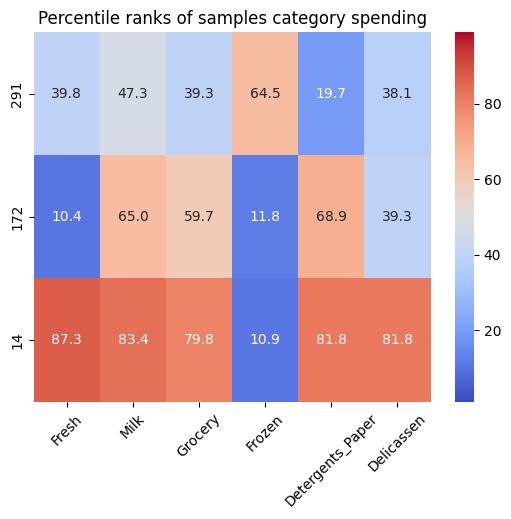

In [12]:
#percentile ranks

pcts = round(100 * df_sales.rank(axis=0, pct=True).iloc[random_clients],2)

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='coolwarm')
plt.title('Percentile ranks of samples category spending')
plt.xticks(rotation=45, ha='center')
plt.show()

__Is the costumer purchasing some amount of one category somehow related to purchasing a proportional amount of other category products? We can easily check this with a supervised learning regression model with one feature removed and then score how well the model can predict the removed feature__

## First regression model - DecisionTreeRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#define features and target
X = df_sales.drop(columns=['Grocery'])
y = df_sales[['Grocery']]

#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#create a decision tree regressor
reg_model = DecisionTreeRegressor(random_state=42)

#fit the training set
reg_model.fit(X_train, y_train)

#get the score with the test set
score = reg_model.score(X_test, y_test)

print(score)

0.6779925253400161


## Feature prepocessing

### Feature Scaling

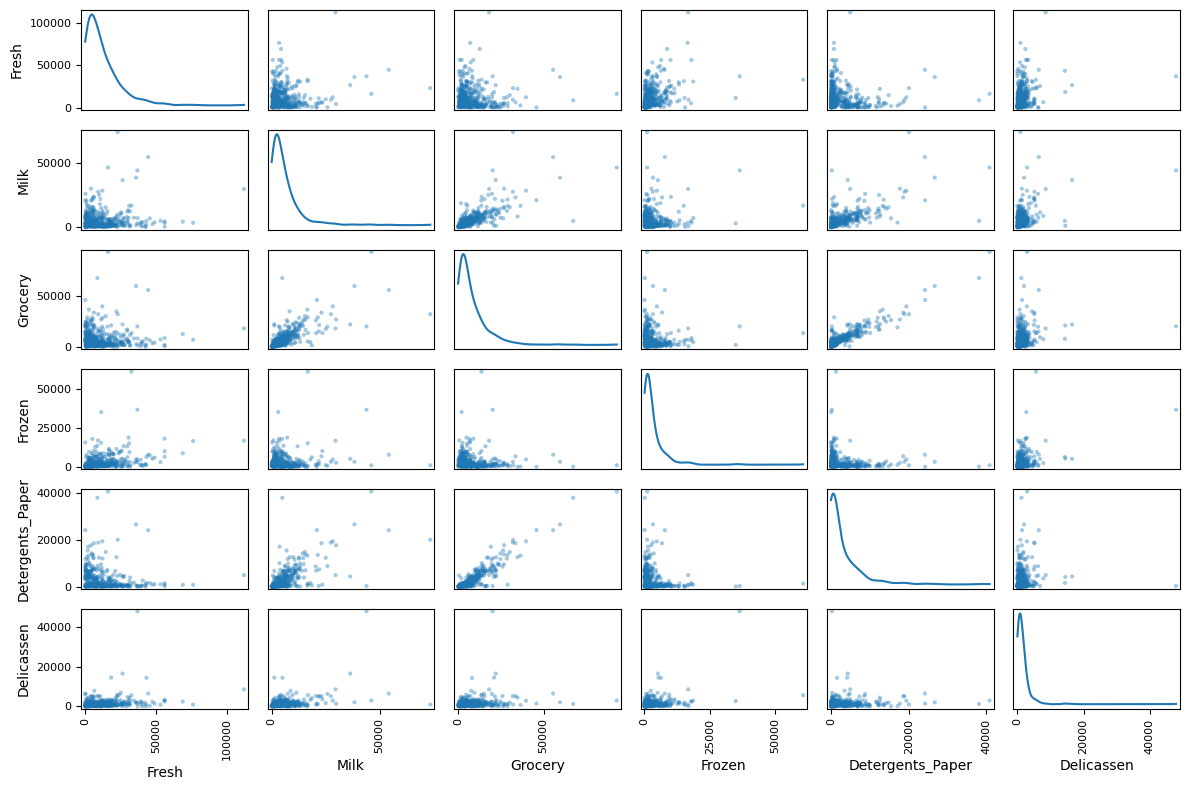

In [14]:
pd.plotting.scatter_matrix(df_sales, alpha=0.4, figsize=(12,8), diagonal='kde')
plt.tight_layout()

#### Log transformation

In [15]:
df_log = np.log(df_sales)

df_log = pd.DataFrame(df_log, columns=df_sales.columns)

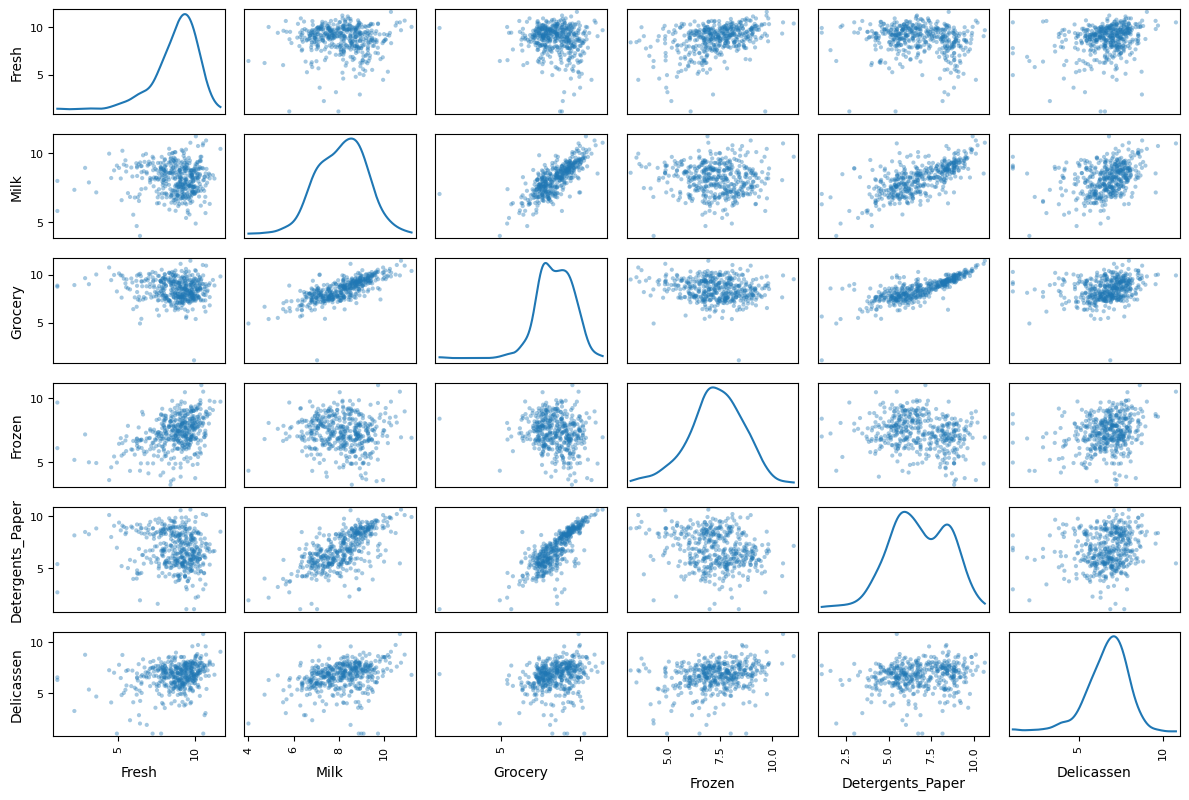

In [16]:
pd.plotting.scatter_matrix(df_log, alpha=0.4, figsize=(12,8), diagonal='kde')
plt.tight_layout()

In [17]:
#define features and target
X_log = df_log.drop(columns=['Grocery'])
y_log = df_log[['Grocery']]

#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, random_state=42, test_size=0.3)

#create a decision tree regressor
reg_model = DecisionTreeRegressor(random_state=42)

#fit the training set
reg_model.fit(X_train, y_train)

#get the score with the test set
score_log = reg_model.score(X_test, y_test)

print(f'Baseline score is {score}')
print(f'Score with log transformation is {score_log}')
print(f'Improvement = {round((score-score_log)/score,3)*100}%')

Baseline score is 0.6779925253400161
Score with log transformation is 0.44445077747195694
Improvement = 34.4%


#### Boxcox transformation

In [18]:
from scipy import stats

df_boxcox = pd.DataFrame()

for col in df_sales.columns:
    transformed_data, _ = stats.boxcox(df[col])
    df_boxcox[col] = transformed_data
    
df_boxcox.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,51.736919,12.670296,16.694342,6.887991,10.154313,15.470232
1,42.989031,12.699553,17.444169,10.638490,10.494584,16.620941
2,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731


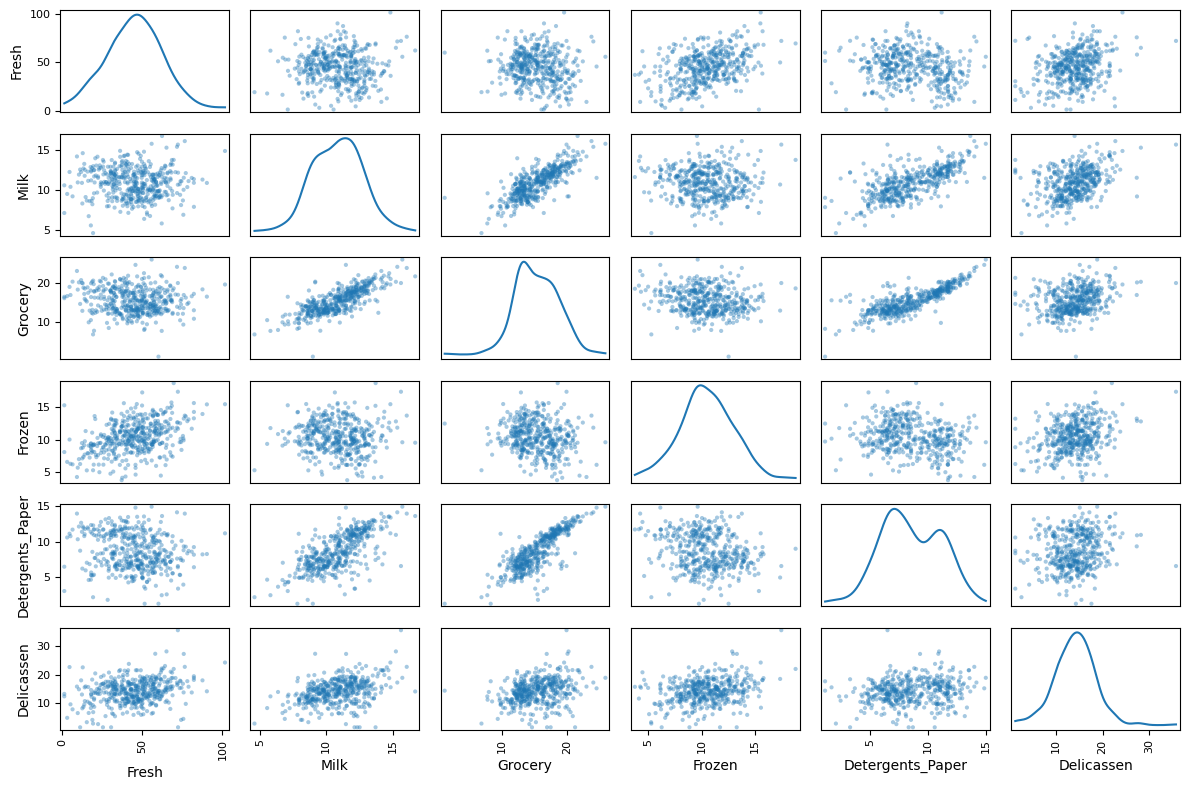

In [19]:
pd.plotting.scatter_matrix(df_boxcox, alpha=0.4, figsize=(12,8), diagonal='kde')
plt.tight_layout()

In [20]:
#define features and target
X_boxcox = df_boxcox.drop(columns=['Grocery'])
y_boxcox = df_boxcox[['Grocery']]

#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_boxcox, y_boxcox, random_state=42, test_size=0.3)

#create a decision tree regressor
reg_model = DecisionTreeRegressor(random_state=42)

#fit the training set
reg_model.fit(X_train, y_train)

#get the score with the test set
score_boxcox = reg_model.score(X_test, y_test)

print(f'Baseline score is {score}')
print(f'Score with boxcox transformation is {score_boxcox}')
print(f'Improvement = {round((score-score_boxcox)/score,3)*100}%')

Baseline score is 0.6779925253400161
Score with boxcox transformation is 0.5239617948036204
Improvement = 22.7%


### Outliers

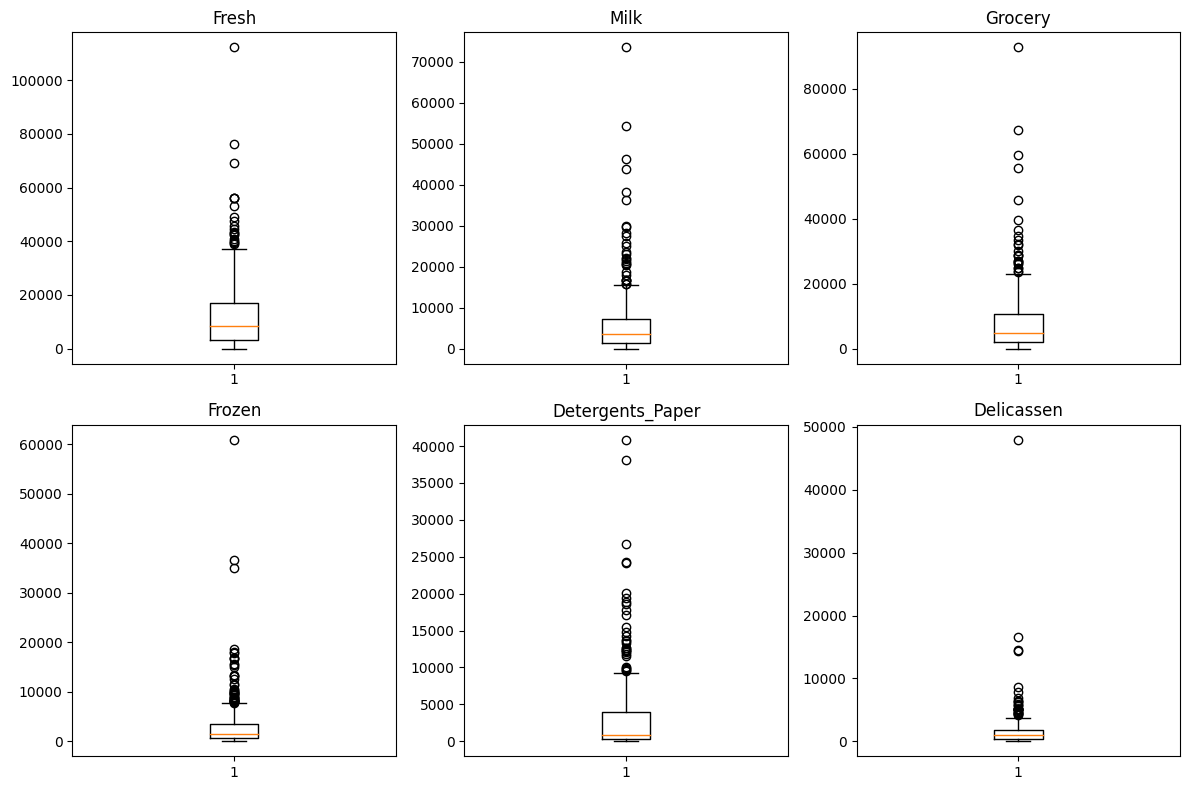

In [21]:
#check for outliers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

for i, feature in enumerate(df_sales.columns):
    #select the current axis
    ax = axes.flatten()[i]
    
    ax.boxplot(df_sales[feature])
    
    ax.set_title(feature)

plt.tight_layout()

plt.show()

__Outlier detection:\
Tukey's Method for detecting outliers -> an outlier step is calculated as 1.5 times the interquartile range (IQR). A feature with a datapoint that is beyond an outlier step outside of the IQR for that feature is considered abnormal.__

In [22]:
df_log.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [23]:
df_log.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [24]:
Q1 = np.percentile(df_log['Fresh'],25)
Q3 = np.percentile(df_log['Fresh'],75)
print((Q3-Q1)*1.5)

2.533507868606793


In [25]:
for feature in df_log.columns:
    
    #Calculate Q1 (25% percentile of the data) for the given feature:
    Q1 = np.percentile(df_log, 25)
    
    #Calculate Q3 (75% percentile of the data) for the given feature:
    Q3 = np.percentile(df_log, 75)
    
    #Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    #Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df_log[~((df_log[feature] >= Q1 - step) & (df_log[feature] <= Q3 + step))])

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


__Remove data points that are outliers for multiple features__

In [26]:
outliers = [66, 75, 338, 142, 154]

df_final = df_log[~df_log.index.isin(outliers)].reset_index(drop=True)

print(f'Original shape: {df_log.shape}')
print(f'Shape after drop: {df_final.shape}')

Original shape: (440, 6)
Shape after drop: (435, 6)


In [27]:
df_final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
430,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
431,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
432,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
433,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [28]:
df_orig_dropped = df[~df.index.isin(outliers)].reset_index(drop=True)

### PCA components

<AxesSubplot:>

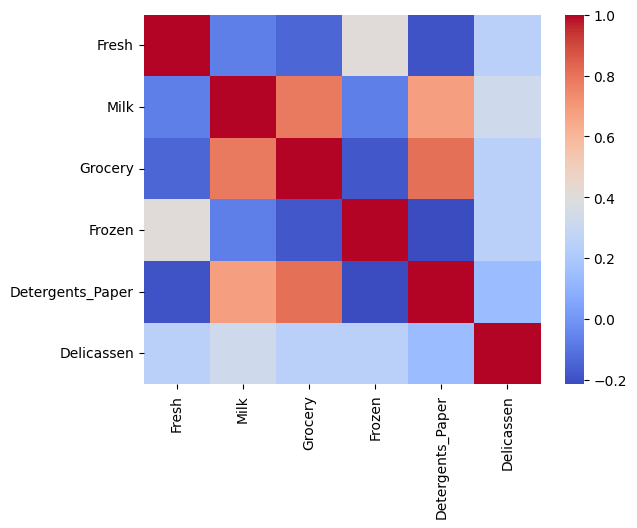

In [29]:
sns.heatmap(df_final.corr(), cmap='coolwarm')

#### Compute the Principal Components

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_final)

PCA()

In [31]:
#Access our 6 PCS
W = pca.components_

#Print PCs as columns
W = pd.DataFrame(W.T,
                index=df_final.columns,
                columns=[f'PC{i}' for i in range(1,7)])

W

,PC1,PC2,PC3,PC4,PC5,PC6
Fresh,0.213116,-0.641898,-0.630125,-0.381271,0.010404,-0.003929
Milk,-0.397218,-0.181427,0.057680,0.013556,0.743163,-0.503488
Grocery,-0.440691,-0.106890,-0.043734,0.005693,0.307592,0.835349
Frozen,0.199960,-0.512952,0.088137,0.828950,-0.011213,0.042947
Detergents_Paper,-0.740300,-0.076943,-0.279150,0.164518,-0.542416,-0.216400
Delicassen,-0.120678,-0.524010,0.715549,-0.374422,-0.242171,-0.001529


__Each PC is a linear combination of the initial df features__

#### Project our dataset into the new space of PCs

In [32]:
df_proj = pca.transform(df_final)
df_proj = pd.DataFrame(df_proj, columns=[f'PC{i}' for i in range(1, 7)])
df_proj

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.709459,-0.029469,-0.501452,-1.863515,0.243431,-0.448571
1,-1.710956,-0.927738,0.188197,0.036977,0.116352,-0.212530
2,-1.759473,-1.760270,1.329788,-0.213157,-0.431009,-0.344140
3,1.262460,-1.385089,0.345786,0.522565,-0.693944,0.621237
4,-0.613910,-2.460375,0.441686,-0.257575,-0.335188,0.010929
...,...,...,...,...,...,...
430,0.805488,-2.863539,0.411712,0.602740,1.938659,0.821688
431,3.328126,-1.762904,0.384531,-0.569488,-0.217056,-0.549651
432,-3.645009,-1.024058,-0.798329,-1.152453,0.004105,0.130294
433,1.721697,-0.317634,0.834298,-1.132147,0.060150,-0.003485


<AxesSubplot:>

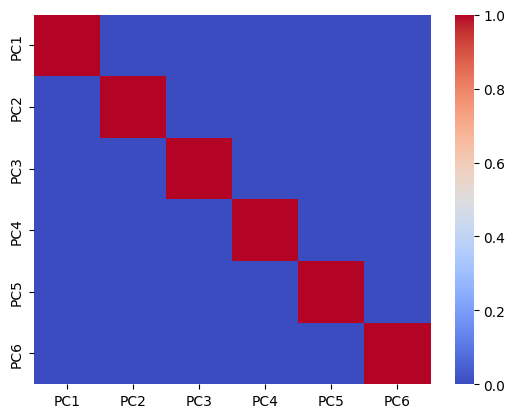

In [33]:
sns.heatmap(df_proj.corr(), cmap='coolwarm')

In [34]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


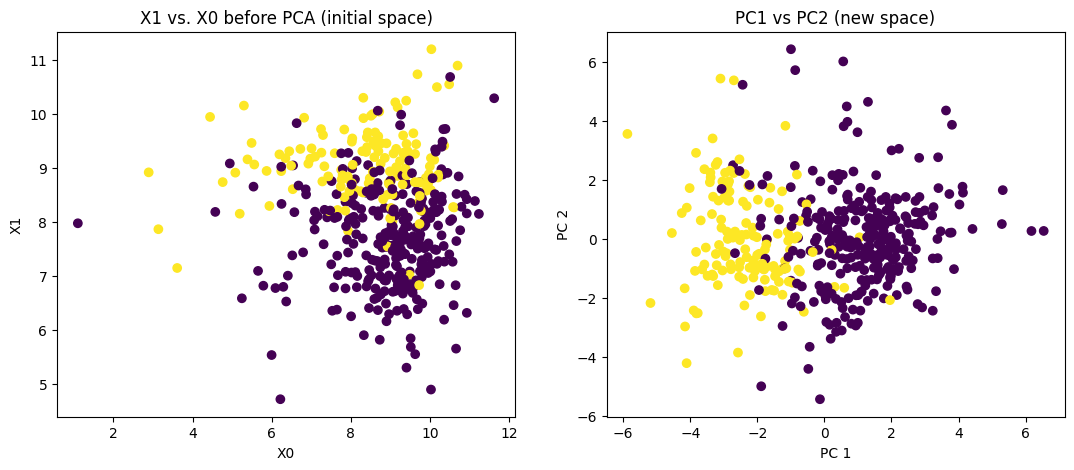

In [35]:
# 2D-slice with feature 'Channel'

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(df_final.iloc[:,0], df_final.iloc[:,1], c=df_orig_dropped['Channel'])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(df_proj.iloc[:,0], df_proj.iloc[:,1], c=df_orig_dropped['Channel']);

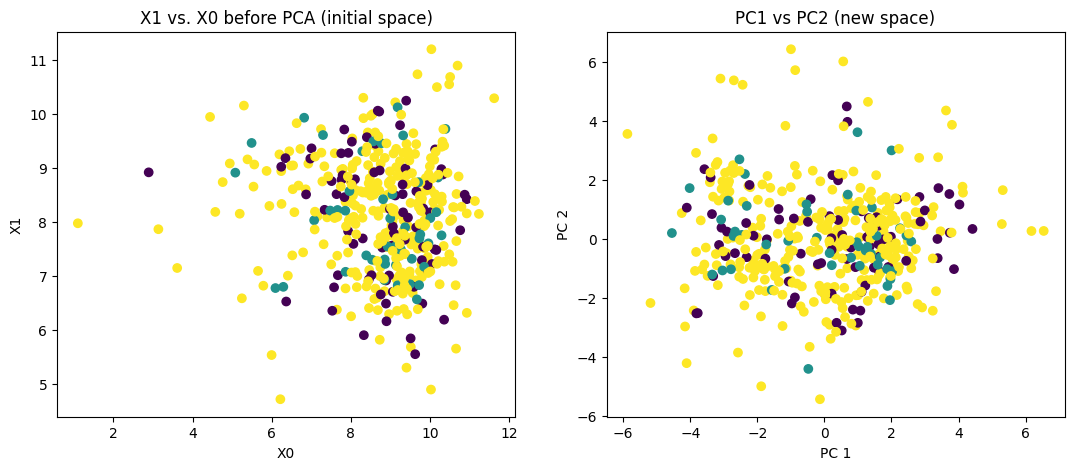

In [36]:
# 2D-slice with feature 'Region'

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(df_final.iloc[:,0], df_final.iloc[:,1], c=df_orig_dropped['Region'])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(df_proj.iloc[:,0], df_proj.iloc[:,1], c=df_orig_dropped['Region']);

__Information comes in the form of variation.
  PC with the most variance is the most important one__

In [37]:
#Let's compute it
df_proj.std()**2/((df_proj.std()**2).sum())

PC1    0.449324
PC2    0.272817
PC3    0.113211
PC4    0.099540
PC5    0.045753
PC6    0.019355
dtype: float64

__~45% of the dataset's variance lies along the first axis__

In [38]:
#this is the same as:
pca.explained_variance_ratio_

array([0.44932362, 0.2728165 , 0.11321111, 0.09953996, 0.04575334,
       0.01935547])

Text(0, 0.5, '% explained variance')

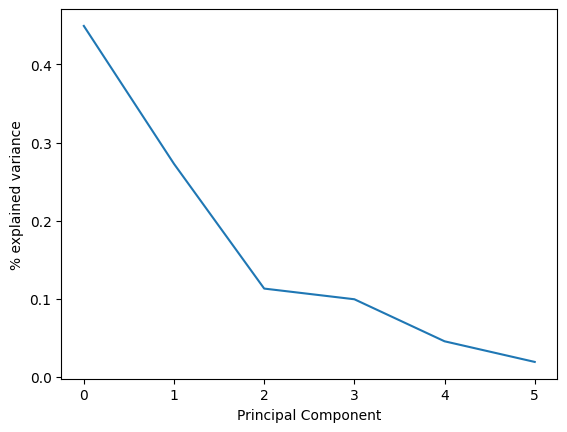

In [39]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance')

__PCA redistributes the ratio among the new features in the most unequal way__

__Choosing k: trade-off between compression and performance__

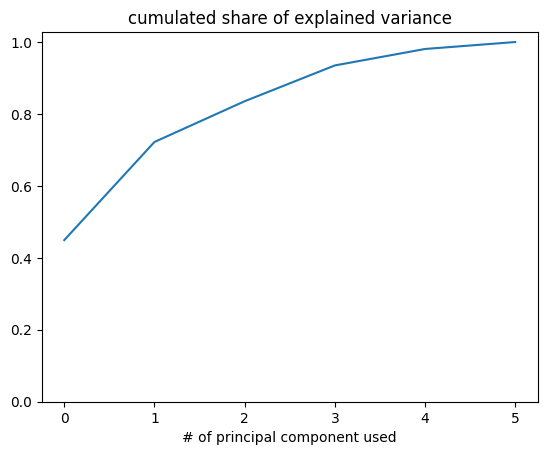

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

__Test Model Performance with k=2 dimensions__

In [41]:
# Fit a PCA with only 2 components
pca2 = PCA(n_components=2).fit(df_final)

# Project your data into 2 dimensions
df_proj2 = pd.DataFrame(pca2.fit_transform(df_final), columns=['PC1', 'PC2'])

# We have "compressed" our dataset in 3D
df_proj2

,PC1,PC2
0,-1.709459,-0.029469
1,-1.710956,-0.927738
2,-1.759473,-1.760270
3,1.262460,-1.385089
4,-0.613910,-2.460375
...,...,...
430,0.805488,-2.863539
431,3.328126,-1.762904
432,-3.645009,-1.024058
433,1.721697,-0.317634


### LogisticRegression with PCA

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_proj2 = df_proj2
y = df_orig_dropped['Channel']

print("accuracy 2 PCs")
print(cross_val_score(LogisticRegression(), X_proj2, y, cv=5).mean())

print("\naccuracy all 6 initial features")
print(cross_val_score(LogisticRegression(), df_final, y, cv=5).mean())

accuracy 2 PCs
0.9011494252873563

accuracy all 6 initial features
0.9080459770114941


### SVC with PCA

In [44]:
from sklearn.svm import SVC

cv_svc = cross_val_score(SVC(class_weight='balanced'), df_final, y, scoring='accuracy')
cv_svc2 = cross_val_score(SVC(class_weight='balanced'), X_proj2, y, scoring='accuracy')


print("accuracy 2 PCs")
print(cv_svc2.mean())

print("\naccuracy all 6 initial features")
print(cv_svc.mean())

accuracy 2 PCs
0.8988505747126437

accuracy all 6 initial features
0.9057471264367816


### Search for ideal number of components for LogisticRegression

In [50]:
df_final.shape

(435, 6)

In [55]:
df_final.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [51]:
df_orig_dropped.shape

(435, 8)

In [56]:
channel_column = df_orig_dropped['Channel']
df_channel = pd.concat([df_final, channel_column], axis=1)
df_channel.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2


In [57]:
X = df_channel.drop(columns=['Channel'])
y = df_channel['Channel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PCA(), LogisticRegression())
pipe

Pipeline(steps=[('pca', PCA()), ('logisticregression', LogisticRegression())])

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe,
                          param_grid={
                              'pca__n_components': [2,3,4,5,6]
                          },
                          cv=5,
                          scoring='accuracy')

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'pca__n_components': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [61]:
grid_search.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('logisticregression', LogisticRegression())])

In [62]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        85
           2       0.93      0.85      0.89        46

    accuracy                           0.92       131
   macro avg       0.92      0.91      0.91       131
weighted avg       0.92      0.92      0.92       131

